In [ ]:
## Mi primer comando de R en colab ##
## Primero seleccionar "Entorno de Ejecucion"->"Cambiar tipo de entorno de ejecucion"->"R" y dejar las opciones por defaulr ##

x <- seq(0, 2*pi, length.out=50)
x

[1] 0.0000000 0.1282283 0.2564565 0.3846848 0.5129131 0.6411414 0.7693696
 [8] 0.8975979 1.0258262 1.1540544 1.2822827 1.4105110 1.5387393 1.6669675
[15] 1.7951958 1.9234241 2.0516523 2.1798806 2.3081089 2.4363372 2.5645654
[22] 2.6927937 2.8210220 2.9492502 3.0774785 3.2057068 3.3339351 3.4621633
[29] 3.5903916 3.7186199 3.8468481 3.9750764 4.1033047 4.2315330 4.3597612
[36] 4.4879895 4.6162178 4.7444460 4.8726743 5.0009026 5.1291309 5.2573591
[43] 5.3855874 5.5138157 5.6420439 5.7702722 5.8985005 6.0267288 6.1549570
[50] 6.2831853

# Ejemplo uso del Test de Wilcoxon



1.Hipotesis

    H0: La mediana de las diferencias de cada par de datos es cero. Mediana(diferencias)=0
    Ha: La mediana de las diferencias entre cada par de datos es diferente de cero. Mediana(diferencias)≠0

In [ ]:
# Definimos los vectores iniciales
antes       <- c( 2, 5, 4, 6, 1, 3 )
despues     <- c( 5, 6, 2, 7, 1, 6 )

2.Cálculo de las diferencias y ordenación de las observaciones

Se calcula la diferencia de cada par de observaciones.

In [ ]:
# Calculo de diferencias
diferencias <- c(antes - despues)

rbind(antes, despues, diferencias)

antes,2,5,4,6,1,3
despues,5,6,2,7,1,6
diferencias,-3,-1,2,-1,0,-3


In [ ]:
# Rankeamos las diferencias

rangosdiferencias <- rank(abs(diferencias[diferencias != 0]))
# La función rank() de R calcula las posiciones automáticamente, solucionando las
# ligaduras en caso de que las haya.

rangosdiferencias <- c(rangosdiferencias[1:4], 0, rangosdiferencias[5])
# Se incorpora un 0 en la posición que ocupan las diferencias nulas para cuadrar
# las posiciones.

In [ ]:
# Apendizamos todas las salidas

tabla <- data.frame(antes = antes, despues = despues, signo = sign(diferencias),
                    diferencia = abs(diferencias), rangos = rangosdiferencias)
tabla

antes,despues,signo,diferencia,rangos
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,5,-1,3,4.5
5,6,-1,1,1.5
4,2,1,2,3.0
6,7,-1,1,1.5
1,1,0,0,0.0
3,6,-1,3,4.5


3.Cálculo del estadístico W

W=min(W+,W−)

    W+= suma de los rangos con signo positivo
    W−= suma de los rangos con signo negativo

In [ ]:
sumaPositivos <- sum(tabla[tabla$signo == 1,"rangos"])
sumaNegativos <- sum(tabla[ tabla$signo == -1,"rangos"] )
W <- min(c( sumaPositivos, sumaNegativos ))
W

[1] 3

4.Cálculo de p-value

Una vez ha obtenido el valor del estadístico W, se puede calcular cuál es la probabilidad de que adquiera valores igual o más extremos que el observado.

    Si el tamaño n < 25, se compara el valor obtenido de W con los valores de una tabla Wilcoxon. Si W cae dentro del intervalo correspondiente en la tabla para ese n, la diferencia NO es significativa.

    Si n > 25 se puede asumir que W se distribuye de forma aproximadamente Normal, rechazando H0

    si Z calculado es menor que el valor de Z para el α (esta es la que utiliza la función de R).

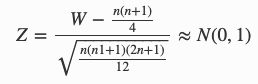

6.Cálculo del tamaño del efecto (side effect)

Parece indicarse que la forma de calcular el tamaño del efecto de un test de Wilcoxon es mediante la correlación de rangos Rank correlation.

In [ ]:
wilcox.test(x = antes, y = despues, alternative = "two.sided", mu = 0, paired = TRUE)

Warning message in wilcox.test.default(x = antes, y = despues, alternative = "two.sided", :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(x = antes, y = despues, alternative = "two.sided", :
“cannot compute exact p-value with zeroes”



	Wilcoxon signed rank test with continuity correction

data:  antes and despues
V = 3, p-value = 0.2763
alternative hypothesis: true location shift is not equal to 0


Cuando hay ligaduras o ties, wilcox.test() no es capaz de calcular el p-value exacto, por lo que devuelve un p-value aproximado asumiendo que W se distribuye de forma aproximadamente normal. En estos casos, o cuando los tamaños muestrales son mayores de 25, es recomendable emplear la función wilcoxsigned_test() del paquete coin, que devuelve el valor exacto de p-value en lugar de una aproximación

In [ ]:
# Instalamos la librería de COIN, como estanmos trabajando en colab, cada vez que
# ejecutemos el código debemos volver a instalar la librería

install.packages('coin')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘TH.data’, ‘sandwich’, ‘libcoin’, ‘matrixStats’, ‘modeltools’, ‘mvtnorm’, ‘multcomp’




In [ ]:
library(coin)
# La función wilcoxsigned_test() del paquete coin requiere pasarle los argumentos
# en forma de función (~), por lo que los datos tienen que estar almacenados en
# forma de data frame.

datos <- data.frame(antes = antes, despues = despues)
wilcoxsign_test(antes ~ despues, data = datos, distribution = "exact")

Loading required package: survival




	Exact Wilcoxon-Pratt Signed-Rank Test

data:  y by x (pos, neg) 
	 stratified by block
Z = -1.272, p-value = 0.25
alternative hypothesis: true mu is not equal to 0


En los casos, o cuando los tamaños muestrales son mayores de 25, es recomendable emplear la función wilcoxsigned_test() del paquete coin,
que devuelve el valor exacto de p-value en lugar de una aproximación.

Un ejemplo detallado se encuentra en:
https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_nonparametric/BS704_Nonparametric6.html